In [24]:
import pandas as pd
df = pd.read_csv('New HIV infections_New HIV infections - All ages_Population_ All ages.csv')

In [25]:
import re

years = []
for item in df.columns:
    match = re.search(r'\d{4}', item)
    if match:
        if match.group() == '1990':
            years.append(match.group())
        else:
            years.append(' ' + match.group())


In [26]:
def remove_duplicate_strings(list):
    new_list = []
    for string in list:
        if string not in new_list:
            new_list.append(string)
    return new_list

columns = remove_duplicate_strings(years)
columns.append('Country')

In [27]:
clean_df = df[columns].dropna()
clean_df = clean_df.replace({'<':''}, regex=True)


In [28]:
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
    'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 
    'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
    'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 
    'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 
    'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

In [34]:
african_clean_df = clean_df[clean_df["Country"].isin(african_countries)]

In [35]:
african_clean_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Country
2,200,200,200,500,500,500,500,500,500,500,...,1900,1900,1900,2000,2000,2000,2100,2200,2200,Algeria
3,6800,8000,9200,10 000,12 000,14 000,15 000,17 000,18 000,20 000,...,23 000,22 000,22 000,22 000,20 000,19 000,18 000,16 000,15 000,Angola
16,4800,5800,6600,7600,8000,8600,8600,8300,8100,7800,...,4200,3300,3000,2900,2500,2000,1800,1800,1500,Benin
20,18 000,24 000,30 000,34 000,36 000,35 000,34 000,31 000,29 000,27 000,...,11 000,10 000,9400,8400,7100,5900,5300,4800,4300,Botswana
24,21 000,21 000,21 000,19 000,18 000,16 000,15 000,14 000,14 000,13 000,...,4200,4200,3800,3100,2800,2500,2200,2100,1900,Burkina Faso
25,28 000,26 000,23 000,17 000,15 000,16 000,14 000,12 000,11 000,10 000,...,3300,3100,2400,2100,2000,1900,1300,1200,1300,Burundi
26,200,200,200,200,200,200,200,200,500,500,...,200,200,500,500,500,200,200,200,200,Cabo Verde
28,16 000,21 000,28 000,36 000,44 000,52 000,58 000,61 000,63 000,62 000,...,25 000,23 000,22 000,20 000,18 000,16 000,14 000,12 000,9900,Cameroon
30,16 000,18 000,20 000,20 000,21 000,20 000,20 000,19 000,17 000,17 000,...,9700,9600,8900,9000,9400,9100,9200,9900,9500,Central African Republic
31,8400,9800,11 000,11 000,12 000,11 000,11 000,11 000,11 000,10 000,...,6100,6500,6200,5800,5300,4900,4600,4100,3800,Chad


In [36]:
african_clean_df.set_index(['Country'], inplace= True)


In [37]:
transposed_african_clean_df = african_clean_df.transpose()
transposed_african_clean_df.reset_index(inplace=True)




In [38]:
transposed_african_clean_df.rename(columns={'index':'Time'}, inplace=True)


In [39]:
transposed_african_clean_df = transposed_african_clean_df.replace('... ', pd.NA)

# Drop columns with NaN values
transposed_african_clean_df = transposed_african_clean_df.dropna(axis=1)


In [40]:
# transposed_african_clean_df = transposed_african_clean_df[transposed_african_clean_df != '...']
for column in transposed_african_clean_df.columns:
    # transposed_african_clean_df = transposed_african_clean_df[transposed_african_clean_df[column] != '... ']
    transposed_african_clean_df[column] = transposed_african_clean_df[column].str.replace(' ', '').astype(int)



/tmp/ipykernel_22946/3156385931.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time-Series Plot of new HIV case in Algeria')

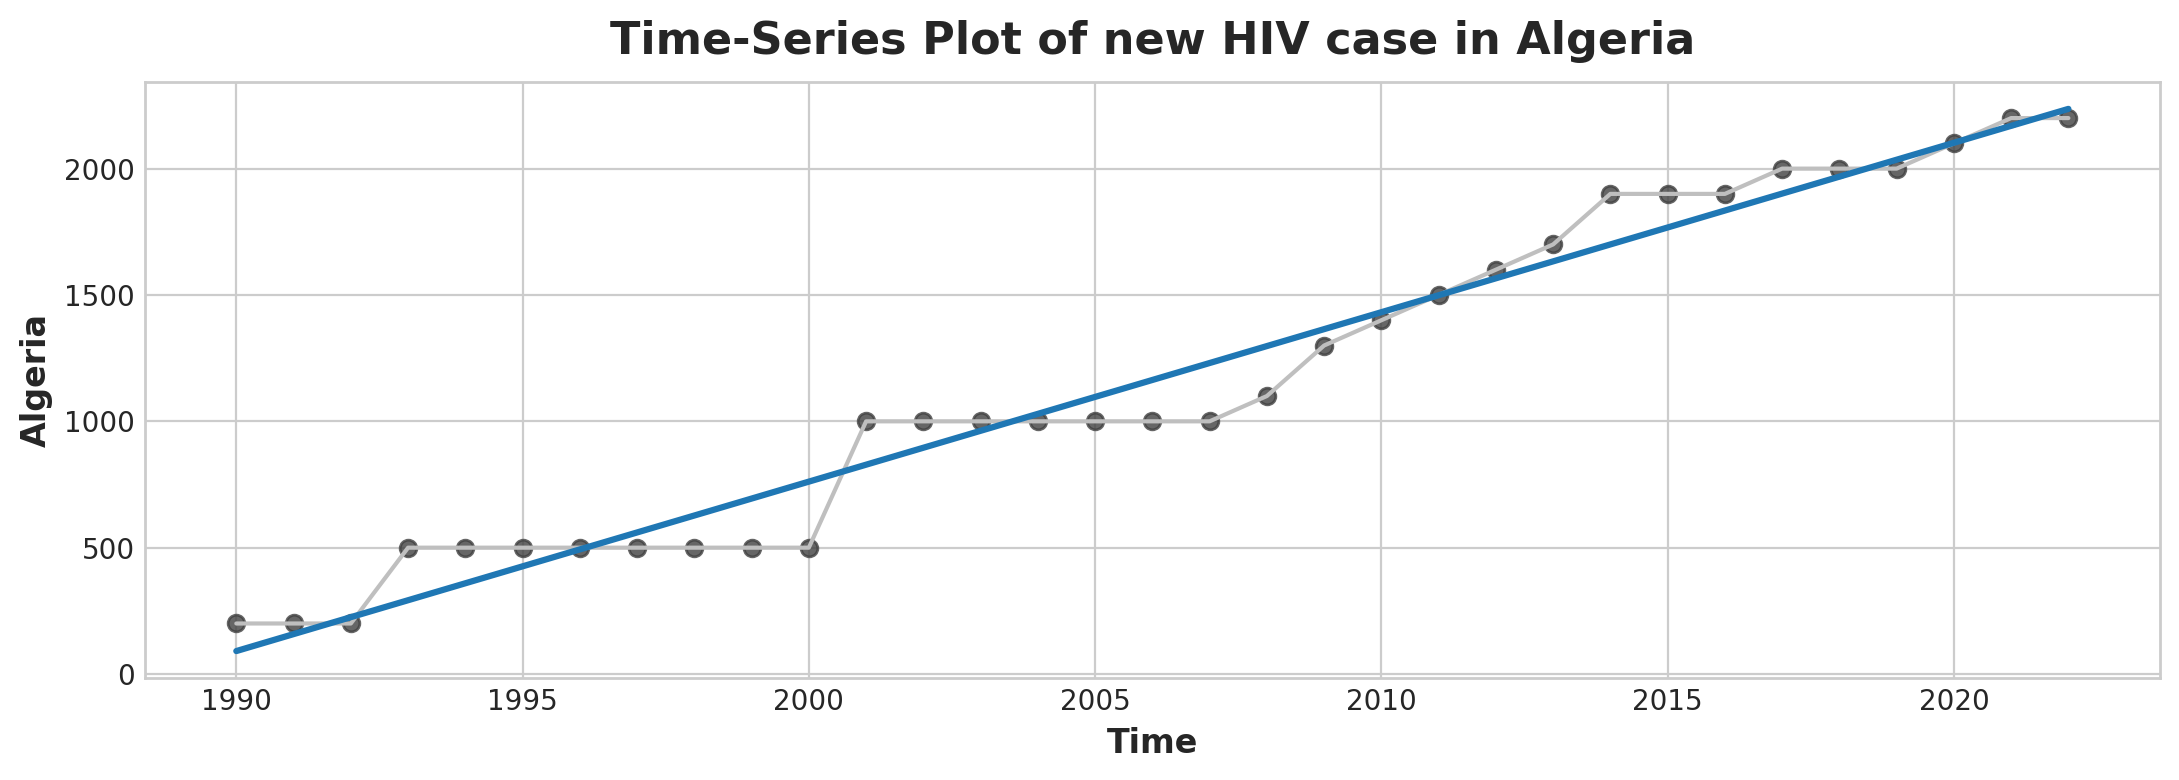

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Algeria', data=transposed_african_clean_df, color='0.75')
ax = sns.regplot(x='Time', y='Algeria', data=transposed_african_clean_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time-Series Plot of new HIV case in Algeria')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'statsmodels'

In [43]:
# You'll add fit and predict methods to this minimal class
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method
    
    def fit(self, X_1, X_2, y):
    # YOUR CODE HERE: fit self.model_1
    self.model_1.fit(X_1,y)

    y_fit = pd.DataFrame(
        # YOUR CODE HERE: make predictions with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=y.columns,
    )

    # YOUR CODE HERE: compute residuals
    y_resid = y - y_fit
    y_resid = y_resid.stack().squeeze() # wide to long

    # YOUR CODE HERE: fit self.model_2 on residuals
    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = y.columns
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid


    def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        # YOUR CODE HERE: predict with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=self.y_columns,
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    # YOUR CODE HERE: add self.model_2 predictions to y_pred
    y_pred += self.model_2.predict(X_2)
    
    return y_pred.unstack()  # long to wide


# Add method to class
BoostedHybrid.predict = predict


# Add method to class
BoostedHybrid.fit = fit

IndentationError: expected an indented block after function definition on line 8 (1923234659.py, line 10)

In [44]:
transposed_african_clean_df.set_index('Time', inplace=True)


In [45]:
country = "Algeria"
steps = 3

In [ ]:
y = pd.DataFrame(transposed_african_clean_df[country]).copy()

# Create trend features
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp.in_sample()  # features for the training data

X_forecast = dp.out_of_sample(steps=steps)


# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X),
    index=y.index,
    columns=y.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_forecast),
    index=X_forecast.index,
    columns=y.columns,
)

# Plot
axs = y.plot(color='0.25', subplots=True, sharex=True)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle(f"New HIV cases in {country}")

In [ ]:
y_pred